In [17]:
import PyPDF2 
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pdf2image import convert_from_path
import os
import pytesseract
from PIL import Image
import shutil
import cv2
import decimal
from zipfile import ZipFile
import glob
import csv
from pprint import pprint
import itertools
import re
import pandas as pd
import tabula

from PIL import Image, ImageDraw

In [18]:
#обработка файлов с проектными декларациями

def declares_recog(package_dir):

    declares = glob.glob(package_dir + '/*_pd*.pdf')

In [19]:
#%%time
#from tika import parser 

#raw = parser.from_file('/Users/deniszagorodnev/Desktop/dev7474_pd47-000690_01.pdf')
#print(raw['content'])

In [4]:
#raw['content'].split('\n')

In [5]:
declar = '/Users/deniszagorodnev/Desktop/declar.pdf'
pdfFileObj = open(declar,'rb')

pdfReader = PyPDF2.PdfFileReader(pdfFileObj)


text = ""

pageObj = pdfReader.getPage(0)
text += pageObj.extractText()

if text != "":
    text = text
else:
    text = textract.process(declar, method='tesseract', language='rus')
        
text_file = open('res', "wb")
text_file.write(text)
text_file.close()


with open('res', "r") as f:
    new_text = f.read()
f.close()
    
os.remove('res')
    



In [6]:


name = new_text.split('\n')[2]
name

'№ 77-001886 от 08.10.2020'

In [20]:


def get_table_data(path):
    data = []

    with open(path) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            for val in row.values():
                data.append(val)
    data = str(data)
    data = re.sub('\]|\[|,|\'', '', data)
    data = data.replace("\\n", "")
    return data

def get_info2(table, info):
    res = re.search(info + '(.*?)' + "г.", table).group(1)
    res = re.sub(' ', '', res)
    return res

def get_info1(table, info):
    res = re.search(info + '(.*?)' + "руб.", table).group(1)
    res = re.sub(' ', '', res)
    return res


def get_info3(table, info):
    res = re.search(info + '(.*?)' + "([0-9][.][0-9][.][0-9])", table).group(1)
    res = re.sub(' ', '', res)
    return res


def get_info5(table, info):
    res = re.search(info + '(.*?)' + "([0-9][.])", table).group(1)
    res = re.sub(' ', '', res)
    return res

In [10]:
list_of_infos = ['Планируемая стоимость строительства:18.1.1строительства ', 
                 'Планируемый квартал и год выполнения этапа реализации проекта строительства:17.1.2',
                'Дата выдачи разрешения на строительство:',
                'Срок действия разрешения на строительство:',
                'Последняя дата продления срока действия разрешения на строительство:']

In [21]:
declar = '/Users/deniszagorodnev/Desktop/new_one.pdf.pdf'

tabula.convert_into(declar, '/Users/deniszagorodnev/Desktop/to.csv', output_format="csv", pages='all', columns = [])

#df = tabula.read_pdf('/Users/deniszagorodnev/Desktop/declar.pdf', pages="all")

df = pd.read_csv('/Users/deniszagorodnev/Desktop/to.csv',  sep='\n') 
df.head()

In [121]:
table

'информационно-телекоммуникационной сети «Интернет» и адресе электронной почты фамилии об имени отчестве (если имеется) лица исполняющего функции единоличного исполнительного органа застройки а также об индивидуализирующем застройщика некоммерческом обозначении 1.1 О фирменном наименовании Организационно-правовая форма:1.1.1застройщика Акционерное общество Полное наименование без указания организационно -правовой формы:1.1.2 Специализированный застройщик ТРАНСПОРТНО-ПЕРЕСАДОЧНЫЙ УЗЕЛ "РАССКАЗОВКА " Краткое наименование без указания организационно-правовой формы:1.1.3 СЗ ТПУ "РАССКАЗОВКА " 1.2 О месте нахождения застройщика – Индекс:адрес указанный в учредительных 1.2.1 105082документах Субъект Российской Федерации:1.2.2 город Москва 1.2.3 Район Субъекта Российской Федерации: Вид населенного пункта:1.2.4 город Наименование населенного пункта:1.2.5 Москва Элемент дорожно-уличной сети:1.2.6 улица Наименование элемента дорожно-уличной сети:1.2.7 Почтовая Б. Тип здания (сооружения):1.2.8 До

In [127]:
declar = '/Users/deniszagorodnev/Desktop/declar1.pdf'

In [128]:
tabula.convert_into(declar, '/Users/deniszagorodnev/Desktop/new_to.csv', output_format="csv", pages='all', columns = [])

In [129]:
table = get_table_data('/Users/deniszagorodnev/Desktop/new_to.csv')

In [119]:
res = re.search('9.3.2' + '(.*?)' + 'м2', table).group(1)
res = re.sub(' ', '', res)

res

'2802800'

In [100]:
def get_space(space):
        space = str(space)
        if 'Суммаобщейплощадивсехжилыхинежилыхпомещений:' in space:
                try:
                    space = int(space[-(len(space) - len('Суммаобщейплощадивсехжилыхинежилыхпомещений:')):])
                    return str(space)
                except:
                    return '0'

        else:
                try:
                    res = int(space)
                    return str(space)
                except:
                    return '0' 
                
get_space('Суммаобщейплощадивсехжилыхинежилыхпомещений:15818617')

'15818617'

In [42]:
test_0 = 'Суммапривлеченныхсредств:20.1.6Определенныйсоглашениемилисделкойсроквозвратапривлеченныхсредств:Кадастровыйномерземельногоучасткаявляющегосяпредметомзалогавобеспечениеисполненияобязательствапо20.1.7возвратупривлеченныхсредств:21Оразмереполностьюоплаченногоуставногокапиталазастройщика21.1РазмерполностьюоплаченногоРазмеруставногокапиталазастройщика:21.1.1уставногокапиталазастройщика496450700'

In [43]:
test_1 = 'Суммапривлеченныхсредств:7356180000'

In [44]:
test_2 = '1750000000'

In [58]:
df = pd.read_excel('/Users/deniszagorodnev/Desktop/res.xlsx') 
df.head()

,Unnamed: 0,Застройщик,Дом,План стоимость,Учредители,Бенефициары,Дата выдачи разрешения на строительство,Срок действия разрешения на строительство,Последнее продление,20% реализации,...,19.7.3.1.1.3,19.7.3.1.2.1,19.7.3.1.2.2,19.7.3.1.2.3,19.7.3.1.3.1,19.7.3.1.3.2,19.7.3.1.3.3,19.6.1.4,19.6.1.5,19.6.1.6
0,0,7729783539,Жилой комплекс с подземной автостоянкой (Винни...,1714810625530,['7736267990 100.0'],['Попович Владислав 100'],30.06.2018,08.02.2021,1,4 квартал 2020,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,8.859972e+07,1.520894e+08,8.859972e+07
1,1,7701387398,"ЖК ""Городские Истории"" по адресу: г. Москва, п...",497400959300,['7704304054 100.0'],['Найденов Ивайло 100'],1,1,1,(2) О примерном,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6.329288e+09,7.356180e+07,6.329288e+09
2,2,7701387398,— |Дом: 38; Строение: 6,3095707583,['7704304054 100.0'],['Найденов Ивайло 100'],23.09.2019,23.09.2021,14.09.2020,3 квартал 2019,...,0.0,47700.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.750000e+07,0.000000e+00
3,3,7814553840,— [Дом: 15/20,1404744000,['771700551954 50.0'],['Трефилов Алексей Владимирович 50'],22.03.2017,22.06.2021,12.03.2020,(2) О примерном,...,0.0,0.0,0.0,1.198610e+09,0.0,0.0,214612.0,0.000000e+00,5.850000e+06,0.000000e+00
4,4,5024154009,"Квартал ""Новые Котельники"" - корпус 5",1565901508,"['501815306268 0.01', '7709426987 99.99']",['Ванчура Александр Петрович 99.98999786376953'],30.10.2018,30.12.2021,1,3 квартал 2019,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.747950e+09,3.220000e+09,1.747950e+09


In [60]:
def get_sum(test):
    if 'Суммапривлеченныхсредств:' in test:
        try:
            res = int(test[-(len(test) - len('Суммапривлеченныхсредств:')):])
            return res
        except:
            return '0'
     
    else:
        try:
            int(test)
            return test
        except:
            return '0'

   
        

In [11]:
infos_19_7 = [['19.7.1.1.1.1', '19.7.1.1.1.2'], ['19.7.1.1.1.2', '19.7.1.1.1.3'], ['19.7.1.1.1.3', '19.7.1.1.2'],
              ['19.7.1.1.2.1', '19.7.1.1.2.2'], ['19.7.1.1.2.2', '19.7.1.1.2.3'], ['19.7.1.1.2.3', '19.7.1.1.3'],
              ['19.7.1.1.3.1', '19.7.1.1.3.2'], ['19.7.1.1.3.2', '19.7.1.1.3.3'], ['19.7.1.1.3.3', '19.7.2'],
              
              ['19.7.2.1.1.1', '19.7.2.1.1.2'], ['19.7.2.1.1.2', '19.7.2.1.1.3'], ['19.7.2.1.1.3', '19.7.2.1.2'],
              ['19.7.2.1.2.1', '19.7.2.1.2.2'], ['19.7.2.1.2.2', '19.7.2.1.2.3'], ['19.7.2.1.2.3', '19.7.2.1.3'],
              ['19.7.2.1.3.1', '19.7.2.1.3.2'], ['19.7.2.1.3.2', '19.7.2.1.3.3'], ['19.7.2.1.3.3', '19.7.3'],
              
              ['19.7.3.1.1.1', '19.7.3.1.1.2'], ['19.7.3.1.1.2', '19.7.3.1.1.3'], ['19.7.3.1.1.3', '19.7.3.1.2'],
              ['19.7.3.1.2.1', '19.7.3.1.2.2'], ['19.7.3.1.2.2', '19.7.3.1.2.3'], ['19.7.3.1.2.3', '19.7.3.1.3'],
              ['19.7.3.1.3.1', '19.7.3.1.3.2'], ['19.7.3.1.3.2', '19.7.3.1.3.3'], ['19.7.3.1.3.3', '20'],
              ['19.6.1.4', '19.6.1.5'], ['19.6.1.5', '19.6.1.6'], ['19.6.1.6', '19.7']
              
              ]

In [12]:
list_of_19_7 = []

for elem in infos_19_7:
    list_of_19_7.append(elem[0])

In [15]:
list_of_19_7

['19.7.1.1.1.1',
 '19.7.1.1.1.2',
 '19.7.1.1.1.3',
 '19.7.1.1.2.1',
 '19.7.1.1.2.2',
 '19.7.1.1.2.3',
 '19.7.1.1.3.1',
 '19.7.1.1.3.2',
 '19.7.1.1.3.3',
 '19.7.2.1.1.1',
 '19.7.2.1.1.2',
 '19.7.2.1.1.3',
 '19.7.2.1.2.1',
 '19.7.2.1.2.2',
 '19.7.2.1.2.3',
 '19.7.2.1.3.1',
 '19.7.2.1.3.2',
 '19.7.2.1.3.3',
 '19.7.3.1.1.1',
 '19.7.3.1.1.2',
 '19.7.3.1.1.3',
 '19.7.3.1.2.1',
 '19.7.3.1.2.2',
 '19.7.3.1.2.3',
 '19.7.3.1.3.1',
 '19.7.3.1.3.2',
 '19.7.3.1.3.3',
 '19.6.1.4',
 '19.6.1.5',
 '19.6.1.6']

In [756]:
def get_infos(table, info1, info2):
    res  = re.search( '(?<=' + info1 + ')(.*)(?=' + info2 + ')', table).group(1)
    res = re.sub(' ', '', res)
    res = re.findall(r'\d+', res)[0]
    if res[0] == '0' and len(res) > 1:
        res = '0'
        
    if len(res) > 4:
        res = res[:-2] + '.' + res[-2:]
        
    return float(res)

In [757]:
for i in range(len(infos_19_7)):
    print(infos_19_7[i][0], get_infos(table, infos_19_7[i][0], infos_19_7[i][1]))

19.7.1.1.1.1 0.0
19.7.1.1.1.2 432.0
19.7.1.1.1.3 0.0
19.7.1.1.2.1 0.0
19.7.1.1.2.2 1.0
19.7.1.1.2.3 0.0
19.7.1.1.3.1 0.0
19.7.1.1.3.2 0.0
19.7.1.1.3.3 0.0
19.7.2.1.1.1 0.0
19.7.2.1.1.2 20725.0
19.7.2.1.1.3 0.0
19.7.2.1.2.1 0.0
19.7.2.1.2.2 140.27
19.7.2.1.2.3 0.0
19.7.2.1.3.1 0.0
19.7.2.1.3.2 0.0
19.7.2.1.3.3 0.0
19.7.3.1.1.1 0.0
19.7.3.1.1.2 1882441867.0
19.7.3.1.1.3 0.0
19.7.3.1.2.1 0.0
19.7.3.1.2.2 15429700.0
19.7.3.1.2.3 0.0
19.7.3.1.3.1 0.0
19.7.3.1.3.2 0.0
19.7.3.1.3.3 0.0
19.6.1.4 742966.36
19.6.1.5 4737373324.0
19.6.1.6 742966.36


In [766]:
from itertools import chain
dict(chain.from_iterable(d.items() for d in ({1 : 2}, {3 : 4})))


{1: 2, 3: 4}

In [295]:
def get_info6(table, info):
    res = re.findall(info + '(.*?)' + "г.", table)
    #res = re.sub(' ', '', res)
    return res

table = get_table_data('/Users/deniszagorodnev/Desktop/res2.csv')

reals = get_info6(table, 'Планируемый квартал и год выполнения этапа реализации проекта строительства:')
#if len(reals) == 0:
#    reals = get_info6(table, 'Планируемый квартал и год выполнения этапа реализации проекта строительства:')

reals

['17.1.2     2 квартал 2021 ',
 '1 квартал 2022 ',
 '3 квартал 2022 ',
 '2 квартал 2023 ',
 '4 квартал 2023 ']

In [298]:
reals[0][-16:]

' 2 квартал 2021 '

In [300]:
reals

[' 2 квартал 2021 ',
 '1 квартал 2022 ',
 '3 квартал 2022 ',
 '2 квартал 2023 ',
 '4 квартал 2023 ']

In [245]:
def append_new_line(developer, house, info, df):
    return df.append({'developer': developer, 'house': house, 'info': info}, ignore_index=True)

In [260]:
declar = '/Users/deniszagorodnev/Desktop/dev7474_pd47-000714_01.pdf'
developer = '12345'


In [261]:
data = get_table_data(declar_table)



'9'

In [30]:
text_file = open('res', "w")
text_file.write(text)
text_file.close()
    
    
with open('res', "r") as f:
        new_text = f.read()
f.close()
        
os.remove('res')
        
name = new_text.split('\n')[4]

name

'Многоэтажный жилой дом, корпус 7. Москва, НАО, поселение Сосенское, д. Столбово, уч.40/2'

In [42]:
nt = new_text.split('\n')

for elem in nt:
    if 'дом' in elem:
        print(elem)

Многоэтажный жилой дом, корпус 7. Москва, НАО, поселение Сосенское, д. Столбово, уч.40/2


In [296]:
tabula.convert_into('/Users/deniszagorodnev/Desktop/from1.pdf', "/Users/deniszagorodnev/Desktop/to.csv", output_format="csv", pages='all')

In [298]:
def get_escrow(table):
    
    res1 = 0
    
    try:
        res1 = re.search("19.7.3.1.1.1(.*?)руб.", table).group(1)
        res1 = int(re.sub(' ', '', res1))
    except:
        None

    res2 = 0
    
    try:
        res2 = re.search("19.7.3.1.2.1(.*?)руб.", table).group(1)
        res2 = int(re.sub(' ', '', res2))
    except:
        None

    return res1 + res2

In [299]:
table = get_table_data("/Users/deniszagorodnev/Desktop/to.csv")

In [300]:

get_escrow(table)

82277767300

In [302]:
from decimal import Decimal

In [378]:
import numpy as np

In [379]:
low = 0.5

high = 0.7




In [450]:
def metric(x, low, high):
    
    if (x >= low) and (x <= high):
        return 0
    
    if x < low:
        x = low - x

        y = np.exp(-x)
        return abs(1 - y)
    
    if x > high:
        x = x - high

        y = np.exp(-x)
        return abs(1 - y)
    
    

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PyPDF2
from pdf2image import convert_from_path
#from PyMuPDF import fitz

In [2]:
def table_recog(declar):          
    
            pdfFileObj = open(declar,'rb')

            pdfReader = PyPDF2.PdfFileReader(pdfFileObj)


            pages = convert_from_path(declar, 100)
            
            for i in range(len(pages)):

                pname = '/Users/deniszagorodnev/Desktop/page_' + str(i) +'.png'
                pages[i].save(pname, 'JPEG')
                
                im1 = cv2.imread(pname, 0)
                im = cv2.imread(pname)
                
                ret,thresh_value = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
                
                kernel = np.ones((5,5),np.uint8)
                dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)
                
                contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
                
                cordinates = []
                for cnt in contours:
                    x,y,w,h = cv2.boundingRect(cnt)
                    cordinates.append((x,y,w,h))
                    #bounding the images
                    if y < 50:
                        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)
                        
                #plt.imshow(im)
                #cv2.namedWindow('detecttable', cv2.WINDOW_NORMAL)
                cv2.imwrite('detecttable.jpg',im)

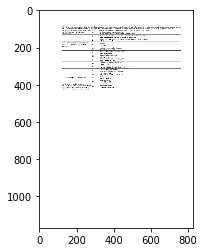

In [3]:
table_recog('/Users/deniszagorodnev/Desktop/pic_parsing.pdf')

In [8]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

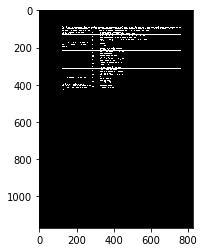

In [9]:

#read your file
file = r'/Users/deniszagorodnev/Desktop/page_0.png'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('/Users/YOURPATH/cv_inverted.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [171]:
declar = '/Users/deniszagorodnev/Desktop/declar_pocl.pdf'

tabula.convert_into(declar, '/Users/deniszagorodnev/Desktop/to.csv', output_format="csv", pages='all', columns = [])

#df = tabula.read_pdf('/Users/deniszagorodnev/Desktop/declar.pdf', pages="all")

df = pd.read_csv('/Users/deniszagorodnev/Desktop/to.csv',  sep='\n') 


,"01 О фирменном наименовании (наименовании) застройщика, месте нахождения застройки, режиме его работы, номере телефона, адресе официального сайта застройщика в"
0,информационно-телекоммуникационной сети «Интер...
1,"единоличного исполнительного органа застройки,..."
2,1.1 О фирменном наименовании Организационно-пр...
3,Полное наименование без указания организационн...
4,"Специализированный застройщик ""Поклонная """


In [173]:
data = get_table_data('/Users/deniszagorodnev/Desktop/to.csv')

In [188]:
def get_capital(test):
    if 'Размеруставногокапиталазастройщика' in test:
        try:
            res = int(re.sub('Размеруставногокапиталазастройщика', '', test))
            return res
        except:
            return test
        
    elif 'уставногокапиталазастройщика' in test:
        try:
            res = int(re.sub('уставногокапиталазастройщика', '', test))
            return res
        except:
            return test
        
    else:
        try:
            int(test)
            return test
        except:
            return '0'

In [189]:
try:
    capital = re.search('21.1.1' + '(.*?)' + "руб", data).group(1)
    capital = re.sub(' ', '', capital)
    capital = get_capital(capital)
except:
    capital = '0'

In [190]:
capital

10000